In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from MCForecastTools import MCSimulation
import hvplot.pandas
import seaborn as sns
%matplotlib inline

In [2]:
# Load the environment variables from the .env file by calling the load_dotenv function
load_dotenv()

True

In [3]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2")

In [4]:
# Set start and end dates of 10 years back from your current date

tickers = [ "SPY"]
timeframe = "1D"
start_date = pd.Timestamp("2010-05-31", tz="America/New_York").isoformat
end_date =  pd.Timestamp("2021-05-13", tz="America/New_York").isoformat



In [5]:
# The start and end dates should be updated with the information set above
ten_years_prices_crypto_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

ten_years_prices_crypto_df.dropna()

SPY                                         
                             open      high       low     close     volume
time                                                                      
2020-12-18 00:00:00-05:00  370.97  371.1500  367.0200  369.1300   89156141
2020-12-21 00:00:00-05:00  364.97  378.4600  362.0300  367.9300   73946581
2020-12-22 00:00:00-05:00  368.21  368.3317  366.0300  367.2200   41116443
2020-12-23 00:00:00-05:00  368.28  369.6200  367.2172  367.5300   37537811
2020-12-24 00:00:00-05:00  368.08  369.0100  367.4500  368.9899   21047937
...                           ...       ...       ...       ...        ...
2021-05-07 00:00:00-04:00  419.89  422.8150  419.1600  422.0900   58002195
2021-05-10 00:00:00-04:00  422.50  422.7400  417.8100  417.9800   72076213
2021-05-11 00:00:00-04:00  413.10  415.2700  410.0600  414.2700  105864172
2021-05-12 00:00:00-04:00  411.23  412.5900  404.0000  405.4500  117663357
2021-05-13 00:00:00-04:00  407.07  412.3500  407.0200  410.2600   96524121

[100 rows x 5 columns]

In [6]:
btc_df =  pd.read_csv(Path("./Resources/BTC_USD_2013-09-30_2021-05-13-CoinDesk.csv"),
    index_col="Date",  
    parse_dates=True, 
    infer_datetime_format=True)

eth_df = pd.read_csv(Path("./Resources/ETH_USD_2015-08-08_2021-05-13-CoinDesk.csv"),
    index_col="Date",  
    parse_dates=True, 
    infer_datetime_format=True)

xrp_df = pd.read_csv(Path("./Resources/XRP_USD_2018-05-31_2021-05-13-CoinDesk.csv"),
    index_col="Date",  
    parse_dates=True, 
    infer_datetime_format=True)

ltc_df = pd.read_csv(Path("./Resources/LTC_USD_2018-05-31_2021-05-13-CoinDesk.csv"),
    index_col="Date",  
    parse_dates=True, 
    infer_datetime_format=True)


In [7]:
display(btc_df.tail() )
display(eth_df.head() )
display(xrp_df.head() )
display(ltc_df.head() )

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-09,BTC,58102.191426,58966.915010,59249.141676,56494.915334
2021-05-10,BTC,55715.546651,58308.318048,59560.025459,53774.628243
2021-05-11,BTC,56573.555472,55899.752971,56956.075029,54571.693210
2021-05-12,BTC,52147.821187,56767.711063,58036.509777,51625.547849
2021-05-13,BTC,49764.132082,49596.778891,51448.798576,46294.720180


,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2015-08-08,ETH,0.909046,1.749289,1.916540,0.794497
2015-08-09,ETH,0.692321,0.909046,0.909046,0.692321
2015-08-10,ETH,0.668067,0.692321,0.692321,0.654331
2015-08-11,ETH,0.850151,0.668067,1.148621,0.668067
2015-08-12,ETH,1.266023,0.850151,1.266023,0.850151


,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2018-05-31,XRP,0.609705,0.616405,0.618404,0.607282
2018-06-01,XRP,0.617604,0.614872,0.621169,0.608681
2018-06-02,XRP,0.643043,0.624189,0.650921,0.618503
2018-06-03,XRP,0.667634,0.644291,0.677069,0.640769
2018-06-04,XRP,0.669680,0.690562,0.706326,0.643054


,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2018-05-31,LTC,117.475053,118.974662,119.628628,117.006761
2018-06-01,LTC,119.934676,118.307052,120.452653,117.390816
2018-06-02,LTC,123.222694,120.171853,124.229394,118.542360
2018-06-03,LTC,125.365456,123.500674,127.920242,122.112908
2018-06-04,LTC,119.522003,124.869538,126.883812,118.303633


In [8]:
star_date_btc = btc_df.loc["2018-05-31" :]
star_date_btc

star_date_eth = eth_df.loc["2018-05-31" :]
star_date_eth 

star_date_xrp = xrp_df.loc["2018-05-31" :]
star_date_xrp

star_date_ltc = ltc_df.loc["2018-05-31" :]
star_date_ltc



display(star_date_btc.head() )
display(star_date_eth.head() )
display(star_date_xrp.head() )
display(star_date_ltc.head() )

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2018-05-31,BTC,7490.621250,7540.810522,7614.063908,7361.565000
2018-06-01,BTC,7518.333329,7494.065482,7599.180474,7393.287588
2018-06-02,BTC,7630.403388,7516.612569,7696.542926,7450.698017
2018-06-03,BTC,7716.145068,7638.232021,7774.829285,7600.263944
2018-06-04,BTC,7505.589277,7706.639829,7760.178308,7451.523947


,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2018-05-31,ETH,570.865740,579.714110,583.906997,566.401273
2018-06-01,ETH,577.257364,576.075224,585.536316,562.263880
2018-06-02,ETH,591.381123,576.481510,597.747636,571.242485
2018-06-03,ETH,618.302767,589.862747,627.715453,589.354724
2018-06-04,ETH,591.549075,618.234340,625.133239,579.802136


,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2018-05-31,XRP,0.609705,0.616405,0.618404,0.607282
2018-06-01,XRP,0.617604,0.614872,0.621169,0.608681
2018-06-02,XRP,0.643043,0.624189,0.650921,0.618503
2018-06-03,XRP,0.667634,0.644291,0.677069,0.640769
2018-06-04,XRP,0.669680,0.690562,0.706326,0.643054


,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2018-05-31,LTC,117.475053,118.974662,119.628628,117.006761
2018-06-01,LTC,119.934676,118.307052,120.452653,117.390816
2018-06-02,LTC,123.222694,120.171853,124.229394,118.542360
2018-06-03,LTC,125.365456,123.500674,127.920242,122.112908
2018-06-04,LTC,119.522003,124.869538,126.883812,118.303633


In [9]:
btc_closing_prices = star_date_btc.loc[:,["Currency","Closing Price (USD)"]]

eth_closing_prices = star_date_eth.loc[:,["Currency","Closing Price (USD)"]]

ltc_closing_prices = star_date_ltc.loc[:,["Currency","Closing Price (USD)"]]

xrp_closing_prices =  star_date_xrp.loc[:,["Currency","Closing Price (USD)"]]

crypto_currencies_closing = [btc_closing_prices, eth_closing_prices, ltc_closing_prices, xrp_closing_prices]
crypto_currencies_closing 
crypto_currencies_closing_df = pd.concat(crypto_currencies_closing) 
crypto_currencies_closing_df

,Currency,Closing Price (USD)
Date,,
2018-05-31,BTC,7490.621250
2018-06-01,BTC,7518.333329
2018-06-02,BTC,7630.403388
2018-06-03,BTC,7716.145068
2018-06-04,BTC,7505.589277
...,...,...
2021-05-09,XRP,1.521989
2021-05-10,XRP,1.416215
2021-05-11,XRP,1.453975


In [10]:
pivot_crypto_currencies_closing_df = crypto_currencies_closing_df.pivot(columns="Currency")
pivot_crypto_currencies_closing_df 

Closing Price (USD)                                   
Currency                   BTC          ETH         LTC       XRP
Date                                                             
2018-05-31         7490.621250   570.865740  117.475053  0.609705
2018-06-01         7518.333329   577.257364  119.934676  0.617604
2018-06-02         7630.403388   591.381123  123.222694  0.643043
2018-06-03         7716.145068   618.302767  125.365456  0.667634
2018-06-04         7505.589277   591.549075  119.522003  0.669680
...                        ...          ...         ...       ...
2021-05-09        58102.191426  3896.321886  382.994167  1.521989
2021-05-10        55715.546651  3998.913215  367.104435  1.416215
2021-05-11        56573.555472  4132.757546  371.689785  1.453975
2021-05-12        52147.821187  4076.959711  337.157160  1.356996
2021-05-13        49764.132082  3767.087985  312.460183  1.340527

[1079 rows x 4 columns]

In [11]:
pivot_crypto_currencies_closing_df.describe()

Closing Price (USD)                                       
Currency                 BTC          ETH          LTC          XRP
count            1079.000000  1079.000000  1079.000000  1079.000000
mean            13514.656280   458.143208    80.204652     0.365434
std             14192.593197   609.946973    56.388161     0.232123
min              3194.962272    83.149241    22.864239     0.138613
25%              6457.803922   170.931606    46.251694     0.244517
50%              8756.961062   226.082983    59.003188     0.304044
75%             11244.916328   409.729417    88.004330     0.432213
max             63346.789035  4132.757546   382.994167     1.809823

In [12]:

pivot_crypto_currencies_closing_df.columns

MultiIndex([('Closing Price (USD)', 'BTC'),
            ('Closing Price (USD)', 'ETH'),
            ('Closing Price (USD)', 'LTC'),
            ('Closing Price (USD)', 'XRP')],
           names=[None, 'Currency'])

In [13]:
pivot_crypto_currencies_closing_df ['Closing Price (USD)'].hvplot(x='Date',
                                 xlabel="Date", 
                                 title = "Cryptocurrencies",
                                 width = 1000,height=500)


:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [14]:
crypto_currencies_closing_df.hvplot(x='Date', groupby="Currency", xlabel="Date", title = "Cryptocurrencies", width = 1000,height=500)

:DynamicMap   [Currency]
   :Curve   [Date]   (Closing Price (USD))

In [15]:
pivot_crypto_currencies_closing_return_df = pivot_crypto_currencies_closing_df.pct_change()

<AxesSubplot:title={'center':'Daily return'}, xlabel='Date'>

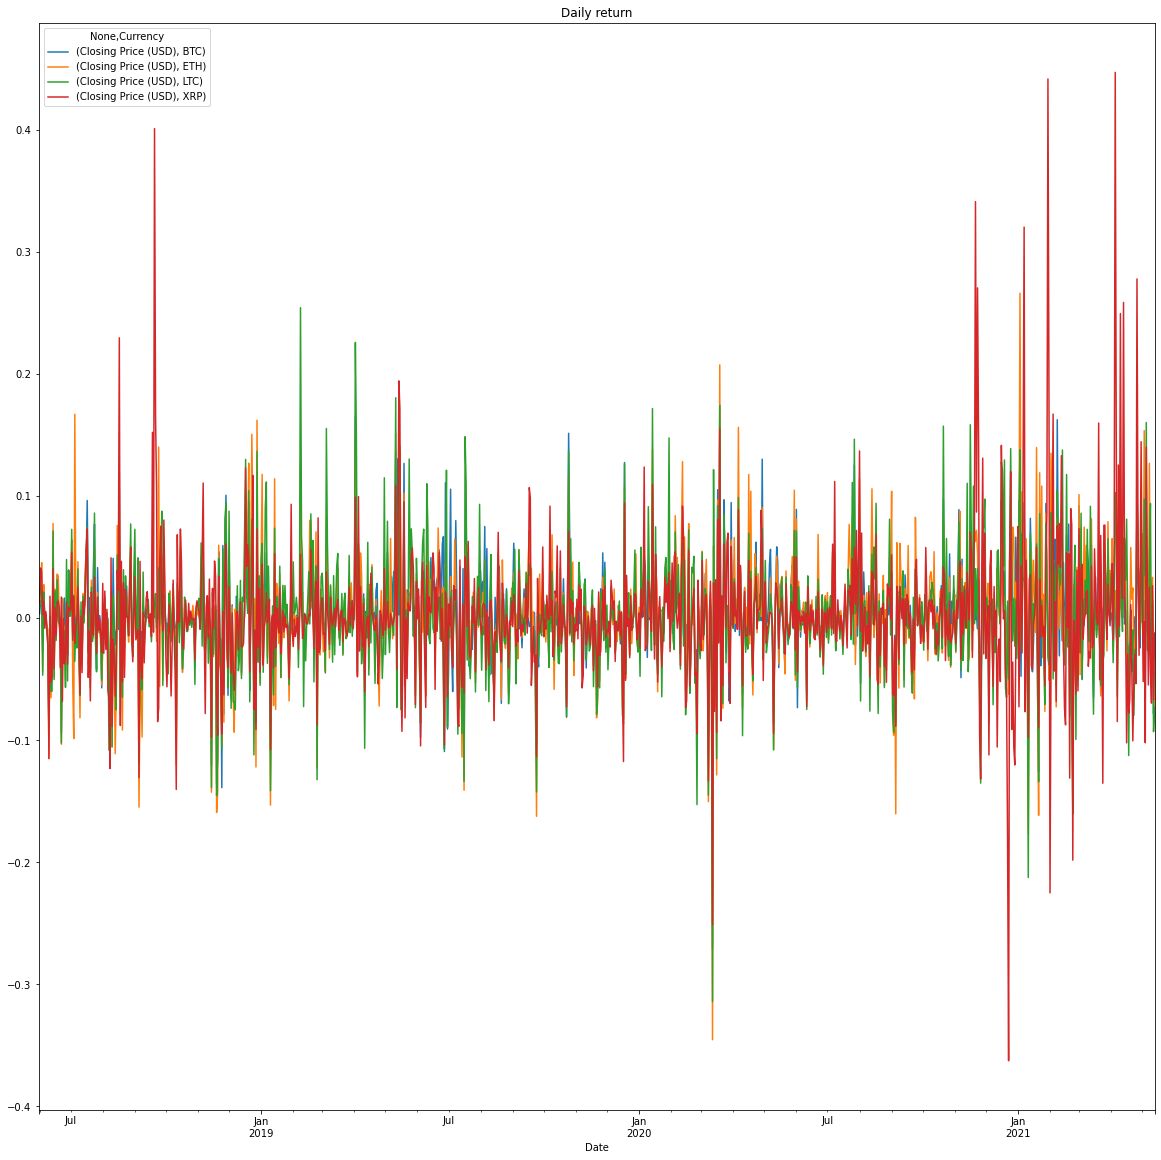

In [16]:
pivot_crypto_currencies_closing_return_df.plot(figsize = (20,20), title = "Daily return")

In [17]:

pivot_crypto_currencies_closing_return_df ['Closing Price (USD)'].hvplot.box(xlabel="Date", title = "Cryptocurrencies Daily Returns volatily", width = 1000, height=500)


:BoxWhisker   [Variable]   (value)

In [18]:
#Cumulative returns

cumulative_returns_df = (1 + pivot_crypto_currencies_closing_return_df).cumprod().dropna() 

cumulative_returns_df.head()


Closing Price (USD)                              
Currency                   BTC       ETH       LTC       XRP
Date                                                        
2018-06-01            1.003700  1.011196  1.020937  1.012955
2018-06-02            1.018661  1.035937  1.048926  1.054678
2018-06-03            1.030107  1.083097  1.067167  1.095012
2018-06-04            1.001998  1.036232  1.017425  1.098367
2018-06-05            1.017831  1.064750  1.039188  1.113770

In [19]:
cumulative_returns_df['Closing Price (USD)'].hvplot(title="Cumulative Returns Cryptocurrencies", width = 1000, height=500)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [20]:
pivot_crypto_currencies_closing_return_df.mean()

                     Currency
Closing Price (USD)  BTC         0.002444
                     ETH         0.002905
                     LTC         0.002176
                     XRP         0.002285
dtype: float64

In [21]:
pivot_crypto_currencies_closing_return_df.std()

                     Currency
Closing Price (USD)  BTC         0.036975
                     ETH         0.047772
                     LTC         0.050378
                     XRP         0.056952
dtype: float64

In [22]:
#Correlation
correlation_cryptocurrencies = pivot_crypto_currencies_closing_return_df.corr()
correlation_cryptocurrencies

Closing Price (USD)                              
Currency                                     BTC       ETH       LTC       XRP
                    Currency                                                  
Closing Price (USD) BTC                 1.000000  0.783595  0.787079  0.523295
                    ETH                 0.783595  1.000000  0.801777  0.568762
                    LTC                 0.787079  0.801777  1.000000  0.578192
                    XRP                 0.523295  0.568762  0.578192  1.000000

<AxesSubplot:xlabel='None-Currency', ylabel='None-Currency'>

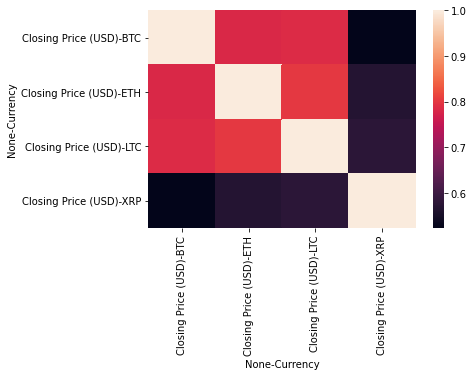

In [24]:
#Visualize the correlation
#correlation_cryptocurrencies["Closing Price (USD)"].hvplot.heatmap( x= "Currency", y="Currency", width = 1000, height=500)
sns.heatmap(correlation_cryptocurrencies)